In [1]:
# Read dataset
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6000 non-null   object 
 1   Rented Bike Count          6000 non-null   int64  
 2   Hour                       6000 non-null   int64  
 3   Temperature(°C)            6000 non-null   float64
 4   Humidity(%)                6000 non-null   int64  
 5   Wind speed (m/s)           6000 non-null   float64
 6   Visibility (10m)           6000 non-null   int64  
 7   Dew point temperature(°C)  6000 non-null   float64
 8   Solar Radiation (MJ/m2)    6000 non-null   float64
 9   Rainfall(mm)               6000 non-null   float64
 10  Snowfall (cm)              6000 non-null   float64
 11  Seasons                    6000 non-null   object 
 12  Holiday                    6000 non-null   object 
 13  Functioning Day            6000 non-null   objec

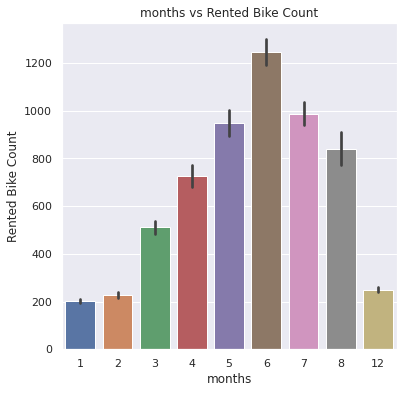

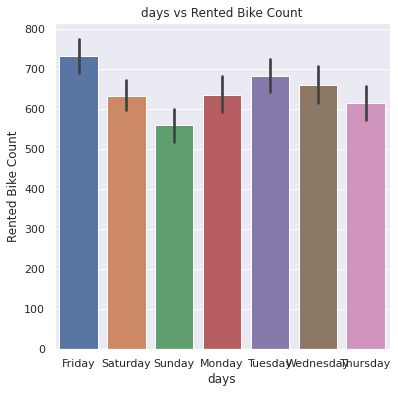

9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6000 non-null   datetime64[ns]
 1   Rented Bike Count          6000 non-null   int64         
 2   Hour                       6000 non-null   int64         
 3   Temperature(°C)            6000 non-null   float64       
 4   Humidity(%)                6000 non-null   int64         
 5   Wind speed (m/s)           6000 non-null   float64       
 6   Visibility (10m)           6000 non-null   int64         
 7   Dew point temperature(°C)  6000 non-null   float64       
 8   Solar Radiation (MJ/m2)    6000 non-null   float64       
 9   Rainfall(mm)               6000 non-null   float64       
 10  Snowfall (cm)              6000 non-null   float64       
 11  Seasons                    6000 non-null   object        
 12  Holi

In [2]:
#Date column
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
train['Date']=pd.to_datetime(train['Date'],format="%d/%m/%Y")
train['months']=train['Date'].dt.month
train['days']=train['Date'].dt.day_name()
fig = plt.figure(figsize=(6,6))
sns.barplot(x='months',y='Rented Bike Count',data=train)
plt.title('months vs Rented Bike Count')
plt.show()
fig = plt.figure(figsize=(6,6))
sns.barplot(x='days',y='Rented Bike Count',data=train)
plt.title('days vs Rented Bike Count')
plt.show()
print(train['months'].nunique())
train.info()


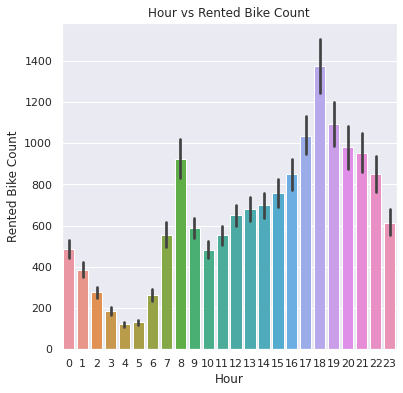

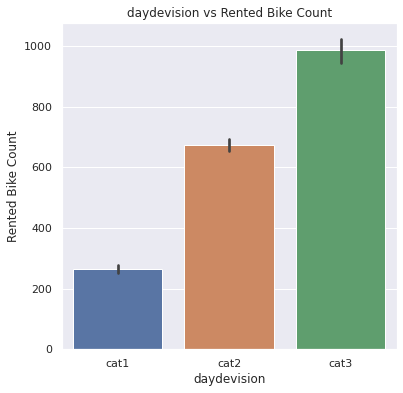

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   
5 2017-12-01                100     5             -6.4           37   
6 2017-12-01                181     6             -6.6           35   
7 2017-12-01                460     7             -7.4           38   
8 2017-12-01                930     8             -7.6           37   
9 2017-12-01                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2             

In [3]:
# hour column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=train)
plt.title('Hour vs Rented Bike Count')
plt.show()
def devcond(x):
  if x<7:
    return "cat1"
  elif x>16:
    return "cat3"
  else:
    return "cat2"

train['daydevision']=train['Hour'].apply(devcond)
fig = plt.figure(figsize=(6,6))
sns.barplot(x='daydevision',y='Rented Bike Count',data=train)
plt.title('daydevision vs Rented Bike Count')
plt.show()
print(train.head(10))
train.info()


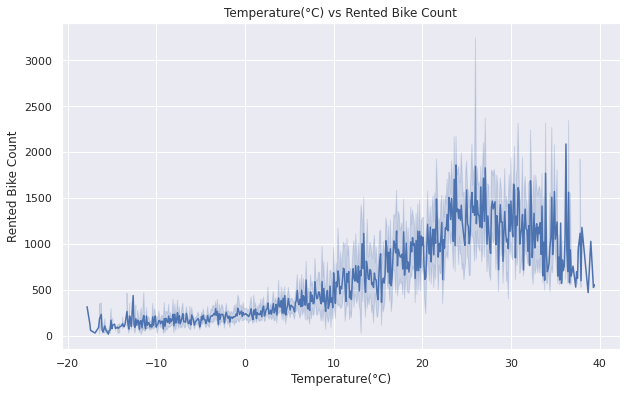

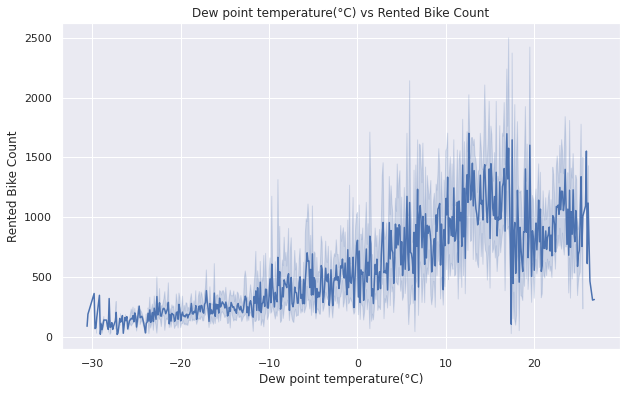

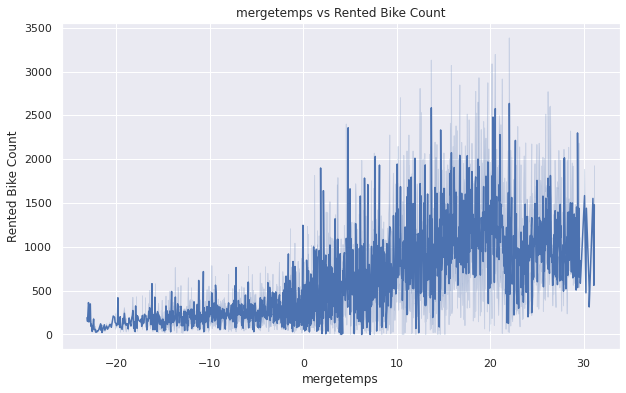

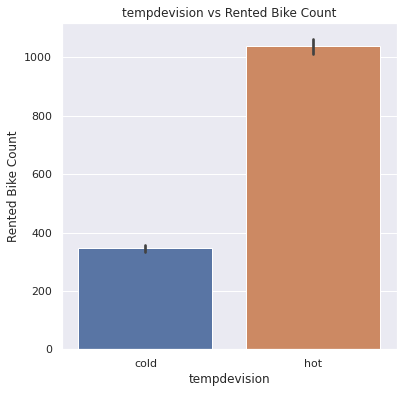

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1     

In [4]:
# temprature column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count',data=train)
plt.title('Temperature(°C) vs Rented Bike Count')
plt.show()
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Dew point temperature(°C)',y='Rented Bike Count',data=train)
plt.title('Dew point temperature(°C) vs Rented Bike Count')
plt.show()
# merge result of two columns
train['mergetemps']=(train['Dew point temperature(°C)']+train['Temperature(°C)'])/2
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='mergetemps',y='Rented Bike Count',data=train)
plt.title('mergetemps vs Rented Bike Count')
plt.show()
# we can devide temps into hot and cold days
def devcond(x):
  if x<10:
    return "cold"
  else:
    return "hot"
train['tempdevision']=train['mergetemps'].apply(devcond)
fig = plt.figure(figsize=(6,6))
sns.barplot(x='tempdevision',y='Rented Bike Count',data=train)
plt.title('tempdevision vs Rented Bike Count')
plt.show()
print(train.head(5))

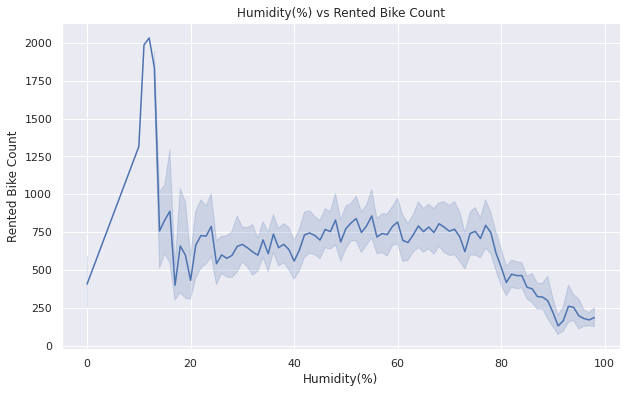

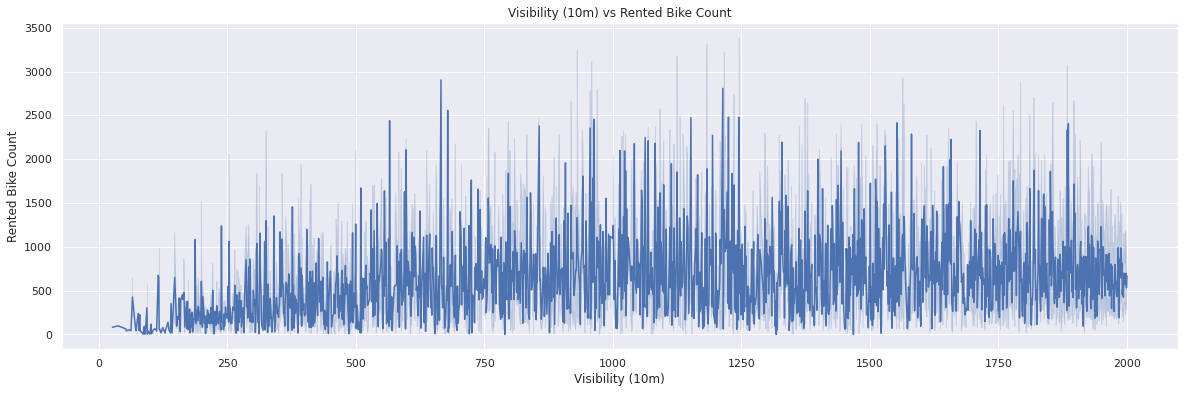

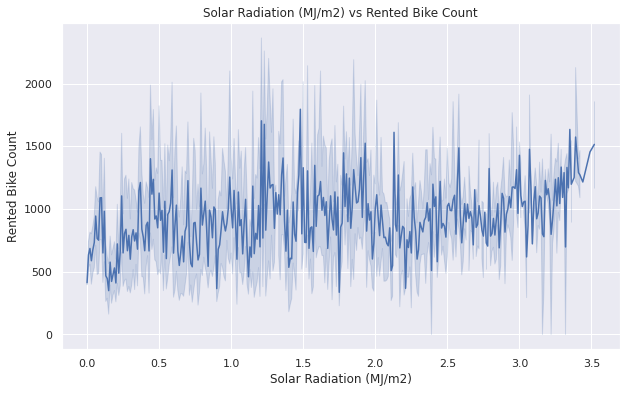

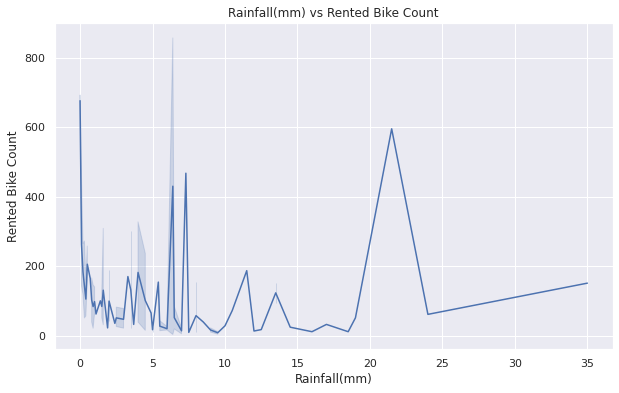

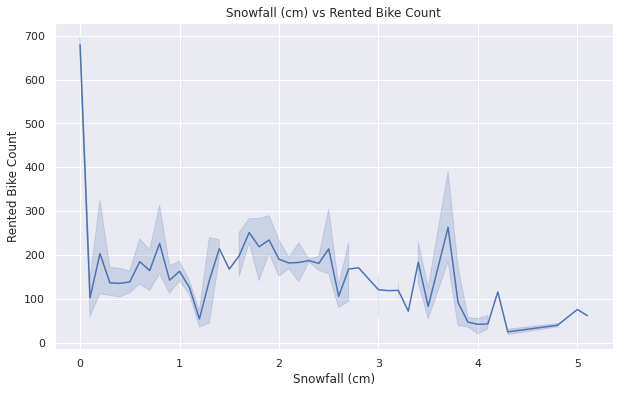

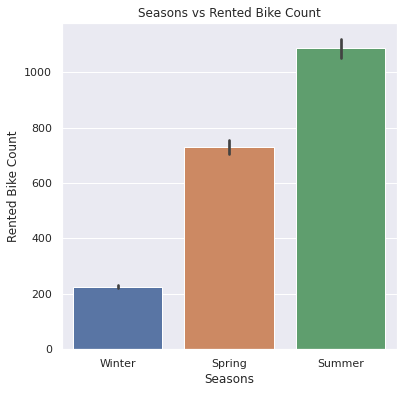

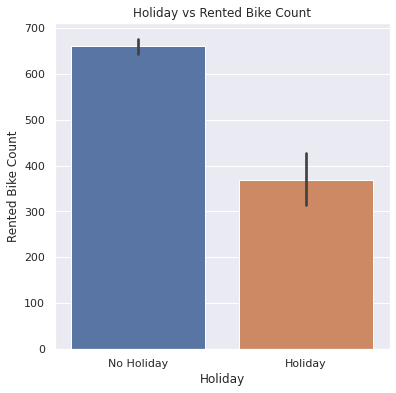

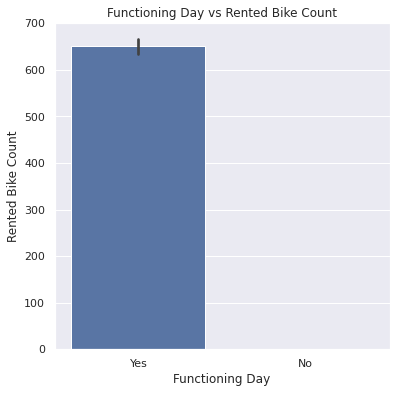

In [5]:
#Humidity(%) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Humidity(%)',y='Rented Bike Count',data=train)
plt.title('Humidity(%) vs Rented Bike Count')
plt.show()
#Visibility (10m) column
fig = plt.figure(figsize=(20,6))
sns.lineplot(x='Visibility (10m)',y='Rented Bike Count',data=train)
plt.title('Visibility (10m) vs Rented Bike Count')
plt.show()
#Solar Radiation (MJ/m2) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',data=train)
plt.title('Solar Radiation (MJ/m2) vs Rented Bike Count')
plt.show()
#Rainfall(mm) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Rainfall(mm)',y='Rented Bike Count',data=train)
plt.title('Rainfall(mm) vs Rented Bike Count')
plt.show()
#Snowfall (cm) column
fig = plt.figure(figsize=(10,6))
sns.lineplot(x='Snowfall (cm)',y='Rented Bike Count',data=train)
plt.title('Snowfall (cm) vs Rented Bike Count')
plt.show()
#Seasons (cm) column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Seasons',y='Rented Bike Count',data=train)
plt.title('Seasons vs Rented Bike Count')
plt.show()
#Holiday (cm) column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Holiday',y='Rented Bike Count',data=train)
plt.title('Holiday vs Rented Bike Count')
plt.show()
#Functioning Day (cm) column
fig = plt.figure(figsize=(6,6))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=train)
plt.title('Functioning Day vs Rented Bike Count')
plt.show()
#scaling numerical columns and one hot encoding categorical columns

In [6]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [18]:
#preprocessing
import category_encoders as catenc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
encode_features=['months','daydevision','tempdevision','Seasons','Holiday','Functioning Day','days']
# scale_features=['mergetemps','Humidity(%)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
encoder=catenc.OneHotEncoder(cols=encode_features,use_cat_names=True)
scaler=StandardScaler()
trainn=encoder.fit_transform(train)
trainn['Rented Bike Count']=np.log1p(trainn['Rented Bike Count'])
# for i in scale_features:
#   train[[i]]=scaler.fit_transform(train[[i]])
trainn.info()
print(trainn.head(5))
used_feats=[i for i in trainn.columns if i not in (['Date','Rented Bike Count','mergetemps','Dew point temperature(°C)'])]
print(used_feats)
X=trainn[used_feats]
y=trainn['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6000 non-null   datetime64[ns]
 1   Rented Bike Count          6000 non-null   float64       
 2   Hour                       6000 non-null   int64         
 3   Temperature(°C)            6000 non-null   float64       
 4   Humidity(%)                6000 non-null   int64         
 5   Wind speed (m/s)           6000 non-null   float64       
 6   Visibility (10m)           6000 non-null   int64         
 7   Dew point temperature(°C)  6000 non-null   float64       
 8   Solar Radiation (MJ/m2)    6000 non-null   float64       
 9   Rainfall(mm)               6000 non-null   float64       
 10  Snowfall (cm)              6000 non-null   float64       
 11  Seasons_Winter             6000 non-null   int64         
 12  Season

In [8]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 71 kB/s 


In [19]:
from catboost import CatBoostRegressor
catb=CatBoostRegressor(iterations=2000,max_depth=10,learning_rate=0.1,l2_leaf_reg=10,verbose=True,loss_function='RMSE')
catb.fit(X_train, y_train,eval_set=(X_test,y_test))

import pickle
pickle.dump(catb, open("/content/catboostmodel.sav", 'wb'))

0:	learn: 1.2092889	test: 1.2404336	best: 1.2404336 (0)	total: 19.3ms	remaining: 38.5s
1:	learn: 1.1352648	test: 1.1664724	best: 1.1664724 (1)	total: 39.1ms	remaining: 39s
2:	learn: 1.0734159	test: 1.1048926	best: 1.1048926 (2)	total: 57.8ms	remaining: 38.5s
3:	learn: 1.0185853	test: 1.0512438	best: 1.0512438 (3)	total: 68.8ms	remaining: 34.3s
4:	learn: 0.9643073	test: 0.9960562	best: 0.9960562 (4)	total: 90.5ms	remaining: 36.1s
5:	learn: 0.9148560	test: 0.9480667	best: 0.9480667 (5)	total: 110ms	remaining: 36.4s
6:	learn: 0.8734915	test: 0.9058717	best: 0.9058717 (6)	total: 121ms	remaining: 34.3s
7:	learn: 0.8339958	test: 0.8674958	best: 0.8674958 (7)	total: 139ms	remaining: 34.6s
8:	learn: 0.7984614	test: 0.8325206	best: 0.8325206 (8)	total: 158ms	remaining: 35s
9:	learn: 0.7696904	test: 0.8033096	best: 0.8033096 (9)	total: 178ms	remaining: 35.4s
10:	learn: 0.7388868	test: 0.7717954	best: 0.7717954 (10)	total: 199ms	remaining: 35.9s
11:	learn: 0.7148991	test: 0.7494246	best: 0.749424

In [16]:
#prepare test set
def devcond(x):
  if x<7:
    return "cat1"
  elif x>16:
    return "cat3"
  else:
    return "cat2"

test['daydevision']=test['Hour'].apply(devcond)
test['Date']=pd.to_datetime(test['Date'],format="%d/%m/%Y")
test['months']=test['Date'].dt.month
test['days']=test['Date'].dt.day_name()
test['mergetemps']=(test['Dew point temperature(°C)']+test['Temperature(°C)'])/2
def devcond(x):
  if x<10:
    return "cold"
  else:
    return "hot"
test['tempdevision']=test['mergetemps'].apply(devcond)
# def devcond(x):
#   if x<6:
#     return "first"
#   else:
#     return "second"
# test['divyear']=test['months'].apply(devcond)
test.info()
testt=encoder.transform(test)
used_featstest=[i for i in testt.columns if i not in (['Date','ID','mergetemps','Dew point temperature(°C)'])]
Xtest=testt[used_featstest]
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2760 non-null   int64         
 1   Date                       2760 non-null   datetime64[ns]
 2   Hour                       2760 non-null   int64         
 3   Temperature(°C)            2760 non-null   float64       
 4   Humidity(%)                2760 non-null   int64         
 5   Wind speed (m/s)           2760 non-null   float64       
 6   Visibility (10m)           2760 non-null   int64         
 7   Dew point temperature(°C)  2760 non-null   float64       
 8   Solar Radiation (MJ/m2)    2760 non-null   float64       
 9   Rainfall(mm)               2760 non-null   float64       
 10  Snowfall (cm)              2760 non-null   float64       
 11  Seasons                    2760 non-null   object        
 12  Holida

In [17]:
#submitions
sub=pd.DataFrame(columns=['ID','Rented Bike Count'])
sub['ID']=test['ID']
predic=catb.predict(Xtest)
predic=np.expm1(predic)
for i in predic:
  print(i)
sub['Rented Bike Count']=predic
sub.to_csv("submisions.csv",index=False)

834.2643574150181
613.4095366078269
463.2902263442109
335.878843688149
221.74355238463056
288.388082895758
557.505097416625
967.7699055636239
1430.0459183071505
781.4080996249559
660.507515140212
618.2815506673428
625.4462967743299
608.1358353364869
679.7294638228136
641.6423664672279
689.7670151121943
1001.9645291589271
1896.0562876551476
1796.7047130947963
1708.8505015764122
1732.388846194336
1483.6510707534942
1067.243894957227
868.0793630314095
719.190673250509
470.75539649485376
310.74069838908775
215.2629260804254
272.7808961209545
485.4941112734325
1039.3778930070077
1595.4384962822496
906.7288026911191
671.4350714747808
686.1982738616284
731.1044642609688
455.3527336651971
690.3596484691986
814.3856847561563
810.0726310147057
346.5375070143559
441.6993319367043
1334.3667181934236
1577.3694077511618
1541.0211662222805
1338.5777244259841
1101.8142162758631
867.4310411182664
723.3908235919316
522.4396995180477
343.1775311348663
228.46721224652924
305.42901554045784
569.18303981338